In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import perceptron as fp

In [9]:
centros = [[2, 2], [4, 4]]
des_p = [0.3, 0.3]
num_amostras = 200
dist = 2

dados = fp.cria_dados(num_amostras, centros, des_p, dist)

In [10]:
train, test = fp.train_test_balanceados(dados, 0.7)

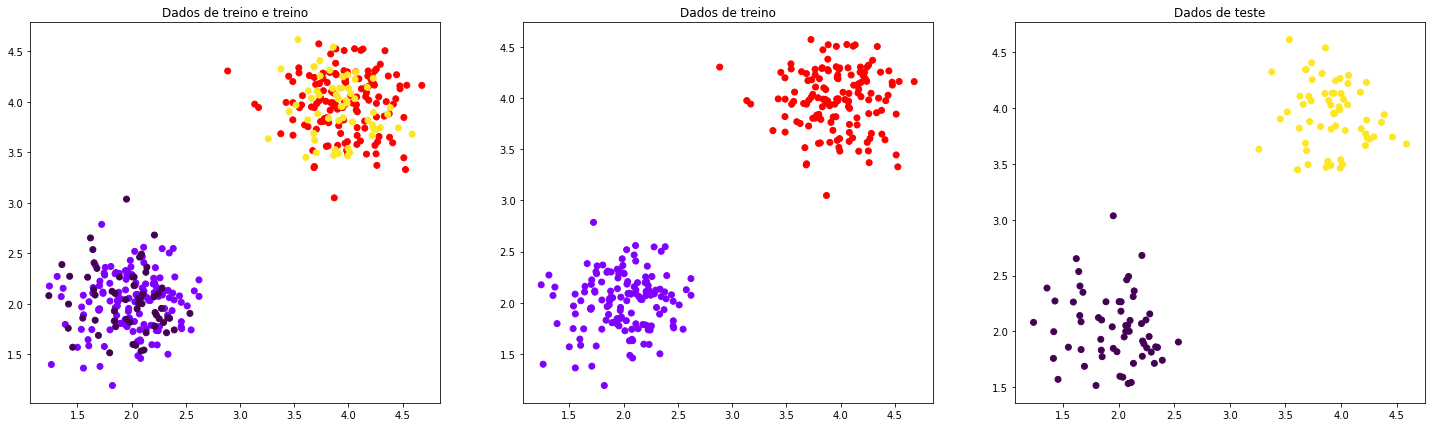

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(25,7))


ax[0].scatter(train[:,0], train[:,1], c = train[:,2], cmap='rainbow')
ax[0].scatter(test[:,0], test[:, 1], c = test[:,2])
ax[0].set_title('Dados de treino e treino')
ax[1].scatter(train[:,0], train[:,1], c = train[:,2], cmap='rainbow')
ax[1].set_title('Dados de treino')
ax[2].scatter(test[:,0], test[:, 1], c = test[:,2])
ax[2].set_title('Dados de teste')
plt.show()

In [12]:
wt, e = fp.trainperceptron(train[:,:2], train[:,2], 0.001, 0.001, 100)

In [13]:
y_pred = fp.yperceptron(test[:, :2], wt)

In [14]:
certos = 0
errados = 0

for classe_prevista, classe_real in zip(y_pred, test[:,2]):
    if (classe_prevista == classe_real):
        certos += 1
    else:
        errados += 1
print(f'Numero de acertos: {certos}\nNúmeros de erros: {errados}\nPorcentagem de acertos: {certos/(certos+errados)*100:.2f}%')

Numero de acertos: 119
Números de erros: 1
Porcentagem de acertos: 99.17%


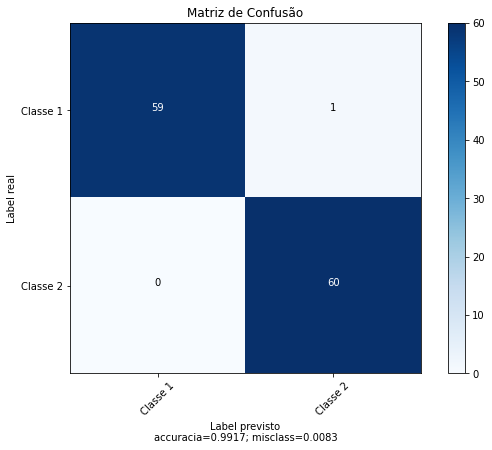

In [18]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(test[:,2], y_pred)
fp.plot_confusion_matrix(conf_mat, ['Classe 1', 'Classe 2'], title='Matriz de Confusão', cmap='Blues', normalize = False)

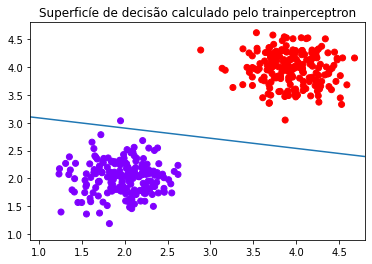

In [25]:
b, w1, w2 = wt
x = -b/w1
y = -b/w2
d = y
c = -y/x

line_x_coords = np.array([0, x])
line_y_coords = c * line_x_coords + d

plt.plot(line_x_coords, line_y_coords)
plt.scatter(dados[:, 0], dados[:, 1], c = dados[:, 2], cmap='rainbow')
plt.title('Superficíe de decisão calculado pelo trainperceptron')
plt.xlim(0.9, 4.8)
plt.ylim(0.9, 4.8)
plt.show()